In [12]:
using HorizonSideRobots
using PyPlot; pygui(true)
h, w = 11, 11
r = Robot(h, w)
show!(r)
South = Sud;
North = Nord;
East = Ost;

┌ Warning: Окно с предыдущей обстановкой при открытии нового было автоматически закрыто
└ @ HorizonSideRobots C:\Users\slava\.julia\packages\HorizonSideRobots\tWWme\src\HorizonSideRobots.jl:186


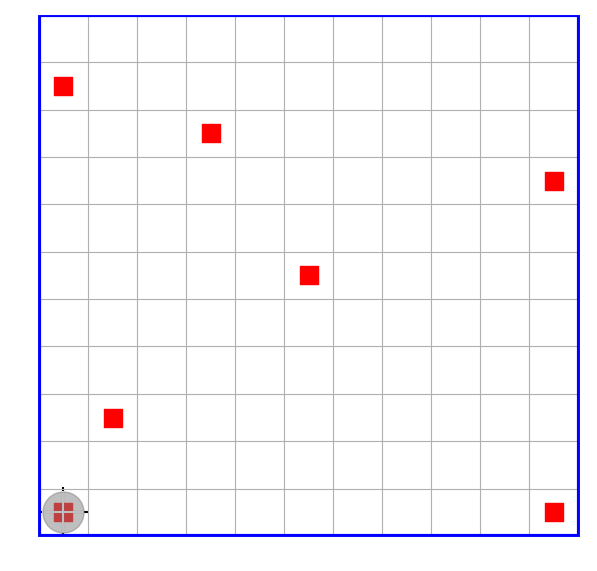

In [13]:
show(r)

In [14]:
function move_and_count(r, side)
    sum_of_temp = 0
    num_of_temp = 0
    if(ismarker(r))
        sum_of_temp += temperature(r)
        num_of_temp += 1
    end
    while !isborder(r, side)
        move!(r, side)
        if(ismarker(r))
            sum_of_temp += temperature(r)
            num_of_temp += 1
        end
    end
    return sum_of_temp, num_of_temp
end

function move_till_border(r, side)
    while !isborder(r, side)
        move!(r, side)
    end
end

function mean_temperature(r)
    total_temp = 0
    total_marked = 0
    while(!isborder(r, North))
        a, b = move_and_count(r, East)
        total_temp += a
        total_marked += b
        move_till_border(r, West)
        move!(r, North)
    end
    a, b = move_and_count(r, East)
    total_temp += a
    total_marked += b
    move_till_border(r, West)
    return total_temp/total_marked
end

mean_temperature (generic function with 1 method)

In [15]:
mean_temperature(r)

71.85714285714286